In [10]:
from pybaseball import statcast
from pybaseball import pitching_stats_bref
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loads in the Baseball Reference and Statcast data

In [11]:
bref_df = pitching_stats_bref("2023")
bref_df = bref_df[["Name", "ERA"]]

bref_df

,Name,ERA
1,Fernando Abad,4.26
2,Andrew Abbott,3.35
3,Cory Abbott,7.48
4,Albert Abreu,4.58
5,Bryan Abreu,2.07
...,...,...
844,Danny Young,1.08
845,Rob Zastryzny,5.21
846,Angel Zerpa,7.04
847,Bruce Zimmermann,5.56


In [12]:
savant_df = statcast(start_dt = "2023-03-30", end_dt = "2023-11-15")
#pd.set_option('display.max_columns', None)

savant_df

This is a large query, it may take a moment to complete


100%|██████████| 231/231 [00:40<00:00,  5.69it/s]


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
3035,FS,2023-09-05,85.0,-1.83,5.53,"Pagán, Emilio",686823,641941,strikeout,swinging_strike,...,8,8,3,3,8,Strategic,Standard,238,0.0,-0.066
3148,FF,2023-09-05,96.4,-1.6,5.49,"Pagán, Emilio",686823,641941,None,foul,...,8,8,3,3,8,Strategic,Standard,211,0.0,0.0
3182,FF,2023-09-05,96.5,-1.76,5.58,"Pagán, Emilio",686823,641941,None,foul,...,8,8,3,3,8,Standard,Standard,211,0.0,-0.024
3330,FF,2023-09-05,96.3,-1.71,5.55,"Pagán, Emilio",686823,641941,None,foul,...,8,8,3,3,8,Standard,Standard,211,0.0,-0.017
3509,FF,2023-09-05,94.7,-1.77,5.61,"Pagán, Emilio",672356,641941,field_out,hit_into_play,...,8,8,3,3,8,Standard,Standard,209,-0.002,-0.196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,SI,2023-03-30,95.3,-3.11,5.24,"Castillo, Luis",680757,622491,None,called_strike,...,0,0,0,0,0,Standard,Standard,234,0.0,-0.081
4077,FF,2023-03-30,94.2,-3.16,5.29,"Castillo, Luis",680757,622491,None,called_strike,...,0,0,0,0,0,Standard,Strategic,229,0.0,-0.075
4211,FF,2023-03-30,94.8,-3.12,5.3,"Castillo, Luis",680757,622491,None,ball,...,0,0,0,0,0,Standard,Strategic,233,0.0,0.134
4374,SI,2023-03-30,95.1,-3.2,5.22,"Castillo, Luis",680757,622491,None,ball,...,0,0,0,0,0,Standard,Standard,237,0.0,0.063


In [13]:
# Converts the Induced Vertical Break and Horizontal Break to inches from feet
savant_df['IVB'] = savant_df['pfx_z'] * 12
savant_df['HB'] = savant_df['pfx_x'] * 12

savant_df = savant_df.rename(columns={'player_name': 'Name', 'pitch_type': 'Pitch Type'})
savant_df

,Pitch Type,game_date,release_speed,release_pos_x,release_pos_z,Name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,IVB,HB
3035,FS,2023-09-05,85.0,-1.83,5.53,"Pagán, Emilio",686823,641941,strikeout,swinging_strike,...,3,3,8,Strategic,Standard,238,0.0,-0.066,11.52,-12.0
3148,FF,2023-09-05,96.4,-1.6,5.49,"Pagán, Emilio",686823,641941,None,foul,...,3,3,8,Strategic,Standard,211,0.0,0.0,17.04,-8.04
3182,FF,2023-09-05,96.5,-1.76,5.58,"Pagán, Emilio",686823,641941,None,foul,...,3,3,8,Standard,Standard,211,0.0,-0.024,19.08,-7.68
3330,FF,2023-09-05,96.3,-1.71,5.55,"Pagán, Emilio",686823,641941,None,foul,...,3,3,8,Standard,Standard,211,0.0,-0.017,17.28,-8.52
3509,FF,2023-09-05,94.7,-1.77,5.61,"Pagán, Emilio",672356,641941,field_out,hit_into_play,...,3,3,8,Standard,Standard,209,-0.002,-0.196,16.68,-9.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,SI,2023-03-30,95.3,-3.11,5.24,"Castillo, Luis",680757,622491,None,called_strike,...,0,0,0,Standard,Standard,234,0.0,-0.081,5.52,-20.28
4077,FF,2023-03-30,94.2,-3.16,5.29,"Castillo, Luis",680757,622491,None,called_strike,...,0,0,0,Standard,Strategic,229,0.0,-0.075,13.92,-15.36
4211,FF,2023-03-30,94.8,-3.12,5.3,"Castillo, Luis",680757,622491,None,ball,...,0,0,0,Standard,Strategic,233,0.0,0.134,14.28,-9.6
4374,SI,2023-03-30,95.1,-3.2,5.22,"Castillo, Luis",680757,622491,None,ball,...,0,0,0,Standard,Standard,237,0.0,0.063,4.92,-20.52


In [14]:
def flip_names(name):
    first_name, last_name = name.split(", ")
    return f"{last_name} {first_name}"

savant_df['Name'] = savant_df["Name"].apply(flip_names)

### Groups by a pitchers' name and finds all the stats used to calculate sPRA

In [19]:
player_grouped = savant_df.groupby(['Name']).agg(
    Pitches = ('Pitch Type', 'count'),
    BB = ('events', lambda x: (x == 'walk').sum()),
    HBP = ('events', lambda x: (x == 'hit_by_pitch').sum()),
    K = ('events', lambda x: (x == 'strikeout').sum()),
    TBF = ('events', lambda x: (x.isin(['other_out', 'single', 'double', 'triple', 'home_run', 'walk', 'strikeout', 'field_out', 'hit_by_pitch', 'sac_fly', 'sac_fly_double_play', 'sac_bunt', 'field_error', 'fielders_choice', 'double_play', 'fielders_choice_out', 'sac_fly_double_play', 'strikeout_double_play', 'catcher_interf', 'triple_play', 'grounded_into_double_play'])).sum()),
    GB = ('bb_type', lambda x: (x == 'ground_ball').sum()),
    LD = ('bb_type', lambda x: (x == 'line_drive').sum()),
    FB = ('bb_type', lambda x: (x == 'fly_ball').sum()),
    PU = ('bb_type', lambda x: (x == 'popup').sum()),
    BIP = ('bb_type', lambda x: (x.isin(['ground_ball', 'line_drive', 'fly_ball', 'popup'])).sum()))

player_grouped = player_grouped[player_grouped['TBF'] >= 350]
player_grouped

,Pitches,BB,HBP,K,TBF,GB,LD,FB,PU,BIP
Name,,,,,,,,,,
Aaron Civale,1727,27,3,95,429,126,74,85,26,311
Aaron Nola,2722,44,1,175,690,197,118,131,33,479
Adam Wainwright,1494,32,1,45,393,130,93,95,9,327
Adrian Houser,1538,28,1,76,390,138,65,75,14,292
Alek Manoah,1689,56,9,79,405,104,65,78,21,268
...,...,...,...,...,...,...,...,...,...,...
Yusei Kikuchi,2410,42,4,152,593,159,105,105,35,404
Zac Gallen,2763,38,3,183,708,202,135,135,20,492
Zach Eflin,2247,20,3,157,603,221,86,92,34,433


In [29]:
K = -0.216668
BB = 0.218963
FB = 0.100319
GB = -0.061018
LD = 0.295364
PU = -0.231931
HBP = 0.373525

player_grouped["sPRA"] = round(
    ((0.85 * (BB * 16.38860664066341 * player_grouped["BB"]) + (HBP * 16.38860664066341 * player_grouped["HBP"]) + (K * 16.38860664066341 * player_grouped["K"]) + 
    (FB * 16.38860664066341 * player_grouped["FB"]) + (LD * 16.38860664066341 * player_grouped["LD"]) + (PU * 16.38860664066341 * player_grouped["PU"]) + (GB * 16.38860664066341 * player_grouped["GB"]))
    / player_grouped["TBF"]) + 4.05, 2)
player_grouped = player_grouped.sort_values(by = "sPRA")
player_grouped = player_grouped.reset_index()
player_grouped

,level_0,index,Name,Pitches,BB,HBP,K,TBF,GB,LD,FB,PU,BIP,sPRA
0,35,0,Spencer Strider,2632,48,8,245,632,121,81,114,26,342,3.55
1,1,1,Zach Eflin,2247,20,3,157,603,221,86,92,34,433,3.62
2,62,2,Freddy Peralta,2495,53,6,187,589,147,69,100,35,351,3.63
3,25,3,Tyler Glasnow,1450,27,1,120,375,117,51,53,9,230,3.64
4,101,5,Shohei Ohtani,2094,55,11,167,524,136,61,76,24,297,3.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,26,126,Miles Mikolas,2721,35,8,113,716,221,159,159,34,573,4.66
127,118,127,Carlos Carrasco,1587,38,6,66,406,140,87,66,14,307,4.68
128,79,128,Connor Seabold,1467,26,7,62,382,93,77,97,22,289,4.72
129,28,129,Noah Syndergaard,1408,19,10,56,386,117,86,85,18,306,4.80


### Merges the BRef and Statcast tables together to have sPRA and ERA on the same table and show the top 25 in sPRA

In [25]:
Merged = pd.merge(bref_df, player_grouped, on='Name', how='left')
Merged.loc[:, "sPRA - ERA"] = round(Merged["sPRA"] - Merged["ERA"], 2)
top25 = Merged.sort_values(by = "sPRA", ascending = True)
top25 = top25[["Name", "sPRA", "ERA", "sPRA - ERA"]].head(25)
top25

,Name,sPRA,ERA,sPRA - ERA
695,Spencer Strider,3.55,3.56,-0.01
196,Zach Eflin,3.62,3.40,0.22
556,Freddy Peralta,3.63,3.95,-0.32
257,Tyler Glasnow,3.64,3.12,0.52
531,Shohei Ohtani,3.74,3.14,0.60
247,Kevin Gausman,3.79,3.30,0.49
769,Logan Webb,3.79,3.49,0.30
651,Kodai Senga,3.79,3.17,0.62
626,Joe Ryan,3.81,4.33,-0.52
369,Clayton Kershaw,3.82,2.48,1.34


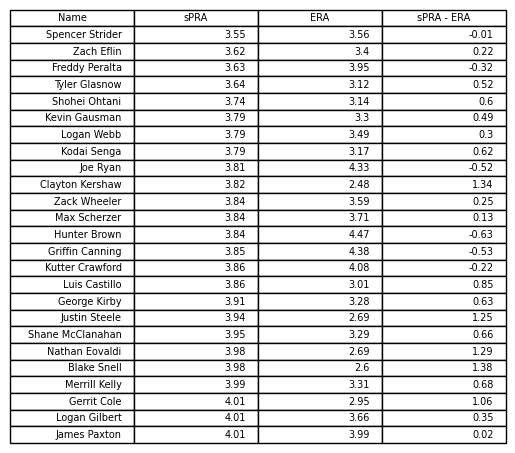

In [23]:
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.axis('tight')
ax.table(cellText= top25.values, colLabels= top25.columns, loc='center')

#plt.savefig("Top25.png")
plt.show()

### Displays the bottom 25 in sPRA

In [26]:
bottom25 = Merged.sort_values(by = "sPRA", ascending = False)
bottom25 = bottom25[["Name", "sPRA", "ERA", "sPRA - ERA"]].head(25)
bottom25

,Name,sPRA,ERA,sPRA - ERA
754,Adam Wainwright,5.03,8.10,-3.07
708,Noah Syndergaard,4.80,6.50,-1.70
648,Connor Seabold,4.72,7.65,-2.93
112,Carlos Carrasco,4.68,6.80,-2.12
483,Miles Mikolas,4.66,4.66,0.00
226,Kyle Freeland,4.63,5.18,-0.55
25,Tyler Anderson,4.62,5.58,-0.96
128,Yonny Chirinos,4.61,5.40,-0.79
478,Tylor Megill,4.57,5.29,-0.72
767,Luke Weaver,4.56,6.77,-2.21


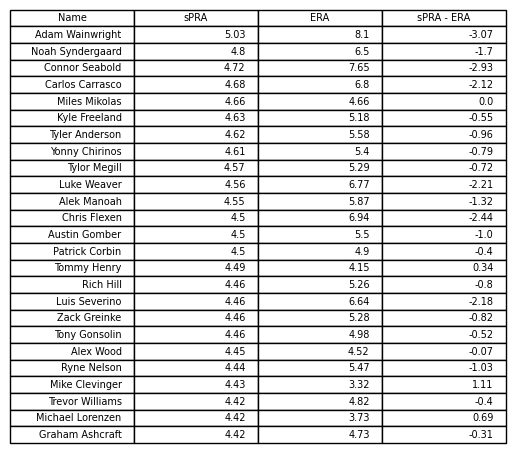

In [27]:
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.axis('tight')
ax.table(cellText= bottom25.values, colLabels= bottom25.columns, loc='center')

#plt.savefig("Bottom25.png")
plt.show()